  ## Online Food EDA & Prediction- Machine Learning

In [ ]:
# Fist Import necessary libraries in scikit learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("onlinefoods.csv")

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
df.duplicated().sum()

103

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head().sum()

Age                                                                         110
Gender                                               FemaleFemaleMaleFemaleMale
Marital Status                                   SingleSingleSingleSingleSingle
Occupation                                  StudentStudentStudentStudentStudent
Monthly Income                No IncomeBelow Rs.10000Below Rs.10000No Income...
Educational Qualifications    Post GraduateGraduatePost GraduateGraduatePost...
Family size                                                                  20
latitude                                                                 64.841
longitude                                                              387.9508
Pin code                                                                2800056
Output                                                          YesYesYesYesYes
Feedback                              PositivePositiveNegative PositivePositive
Unnamed: 12                             

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

/var/folders/8c/20t35gwd03j9m2lldclbwr6c0000gn/T/ipykernel_18638/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.212541,0.048413,0.032969,0.051374
Family size,0.212541,1.000000,-0.048674,0.060691,0.015686
latitude,0.048413,-0.048674,1.000000,-0.147992,-0.231334
longitude,0.032969,0.060691,-0.147992,1.000000,0.136400
Pin code,0.051374,0.015686,-0.231334,0.136400,1.000000


In [11]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [12]:
Avg_age = df['Age'].mean()

In [13]:
Avg_age

24.67719298245614

In [19]:
age = df.groupby('Gender')['Family size'].mean()

In [20]:
age

Gender
Female    3.380165
Male      3.189024
Name: Family size, dtype: float64

In [21]:
Marital_Status = df.groupby('Gender')['Marital Status'].count()
Marital_Status

Gender
Female    121
Male      164
Name: Marital Status, dtype: int64

In [23]:
Postg_deg = df.groupby('Gender')['Educational Qualifications'].value_counts()

In [26]:
pd.DataFrame(Postg_deg)

Educational Qualifications
Gender Educational Qualifications                            
Female Post Graduate                                       54
       Graduate                                            52
       Ph.D                                                 9
       School                                               5
       Uneducated                                           1
Male   Graduate                                            74
       Post Graduate                                       71
       Ph.D                                                12
       School                                               6
       Uneducated                                           1

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 386
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         285 non-null    int64  
 1   Gender                      285 non-null    object 
 2   Marital Status              285 non-null    object 
 3   Occupation                  285 non-null    object 
 4   Monthly Income              285 non-null    object 
 5   Educational Qualifications  285 non-null    object 
 6   Family size                 285 non-null    int64  
 7   latitude                    285 non-null    float64
 8   longitude                   285 non-null    float64
 9   Pin code                    285 non-null    int64  
 10  Output                      285 non-null    object 
 11  Feedback                    285 non-null    object 
 12  Unnamed: 12                 285 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [29]:
pd.DataFrame(df.isnull().sum())

,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
Educational Qualifications,0
Family size,0
latitude,0
longitude,0
Pin code,0


In [30]:
print(df.describe())

              Age  Family size    latitude   longitude       Pin code
count  285.000000   285.000000  285.000000  285.000000     285.000000
mean    24.677193     3.270175   12.973429   77.597593  560037.280702
std      3.040977     1.361178    0.043964    0.053557      30.738306
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.943800   77.563500  560010.000000
50%     24.000000     3.000000   12.977000   77.587700  560028.000000
75%     26.000000     4.000000   12.998000   77.622700  560066.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


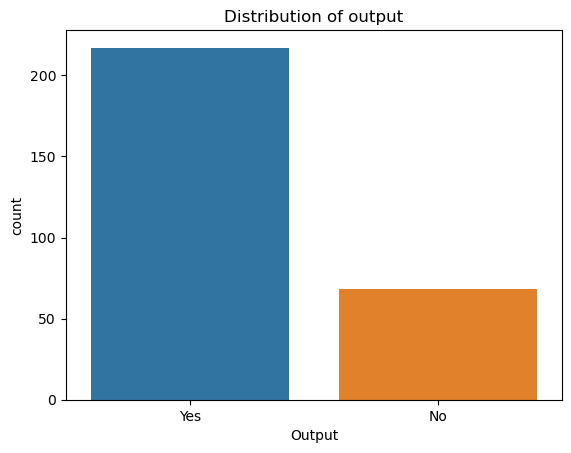

In [32]:
sns.countplot(x='Output',data=df)
plt.title('Distribution of output')
plt.show()

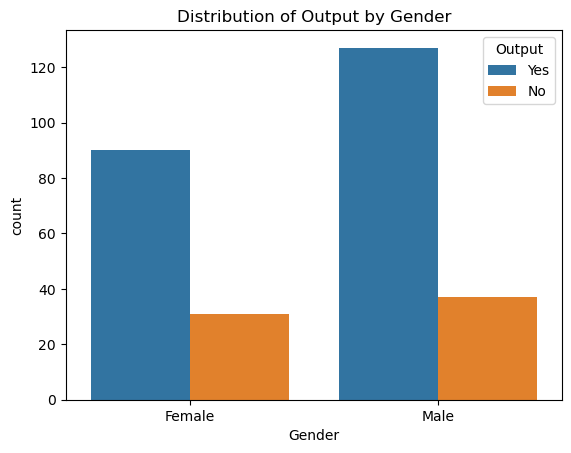

In [33]:
sns.countplot(x='Gender', hue='Output', data=df)
plt.title('Distribution of Output by Gender')
plt.show()

In [37]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


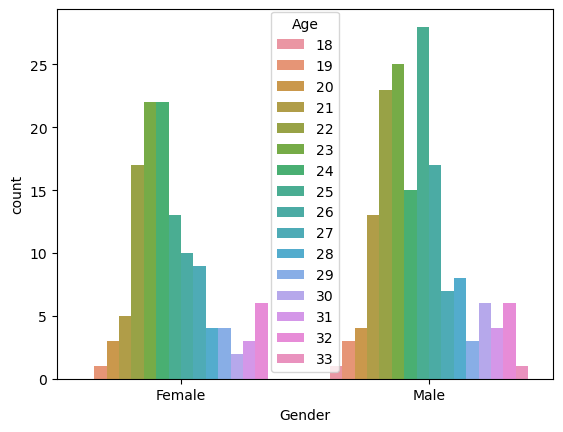

In [36]:
sns.countplot(x='Gender', hue='Age', data=df)
plt.show()

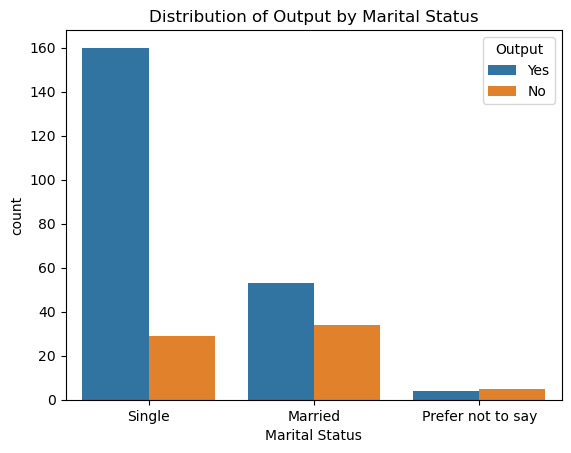

In [38]:
sns.countplot(x='Marital Status', hue='Output', data=df)
plt.title('Distribution of Output by Marital Status')
plt.show()

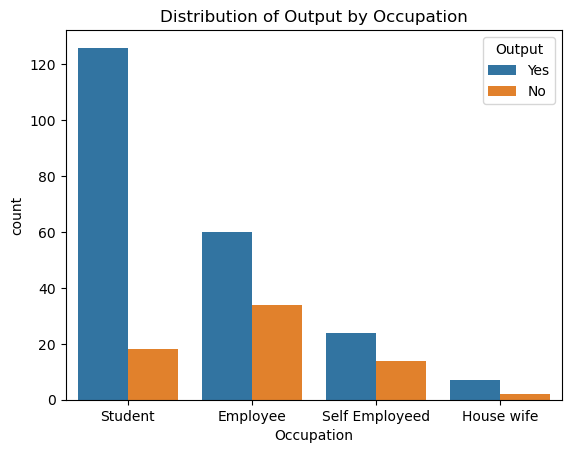

In [39]:
sns.countplot(x='Occupation', hue='Output', data=df)
plt.title('Distribution of Output by Occupation')
plt.show()

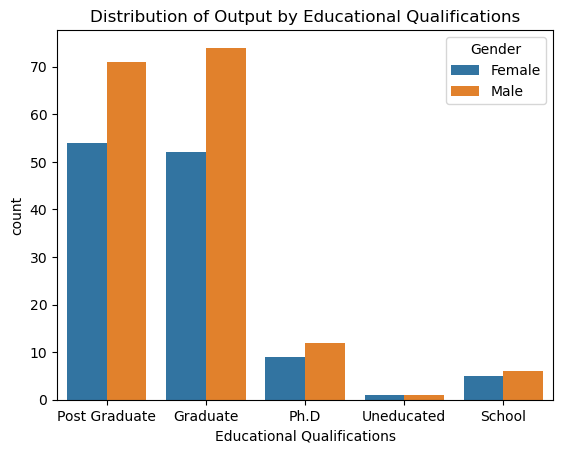

In [43]:
sns.countplot(x='Educational Qualifications', hue='Gender', data=df)
plt.title('Distribution of Output by Educational Qualifications')
plt.show()

In [44]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [45]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [46]:
label = LabelEncoder()

In [47]:
col_list = list(df.columns)

In [48]:
col_list

['Age',
 'Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Family size',
 'latitude',
 'longitude',
 'Pin code',
 'Output',
 'Feedback',
 'Unnamed: 12']

In [50]:
col_list = df.columns

for col in col_list:
    print(col)

Age
Gender
Marital Status
Occupation
Monthly Income
Educational Qualifications
Family size
latitude
longitude
Pin code
Output
Feedback
Unnamed: 12


In [51]:
columns = ['Age','Gender','Marital Status','Occupation','Monthly Income',
           'Educational Qualifications','Family size','latitude','longitude',
           'Pin code','Output','Feedback','Unnamed: 12']
df[columns]= df[columns].apply(lambda col : label.fit_transform(col))



In [52]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,2,0,2,3,4,2,3,38,46,0,1,1,1
1,6,0,2,3,2,0,2,39,35,8,1,1,1
2,4,1,2,3,2,2,2,26,67,16,1,0,1
3,4,0,2,3,4,0,5,23,25,18,1,1,1
4,4,1,2,3,2,2,3,44,20,9,1,1,1


In [53]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
355,3,1,2,3,4,0,1,55,47,39,0,1,0
363,13,1,0,0,3,1,2,15,13,63,1,1,1
369,12,1,0,0,3,2,5,20,61,68,1,1,1
374,3,1,2,3,4,0,2,73,43,66,1,0,1
386,5,1,2,3,2,2,1,39,35,8,1,1,1


In [54]:
df.drop(columns=['Unnamed: 12'], inplace=True)

In [55]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,2,0,2,3,4,2,3,38,46,0,1,1
1,6,0,2,3,2,0,2,39,35,8,1,1
2,4,1,2,3,2,2,2,26,67,16,1,0
3,4,0,2,3,4,0,5,23,25,18,1,1
4,4,1,2,3,2,2,3,44,20,9,1,1


In [56]:
x= df.drop(columns=['Output'])

In [57]:
x

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
0,2,0,2,3,4,2,3,38,46,0,1
1,6,0,2,3,2,0,2,39,35,8,1
2,4,1,2,3,2,2,2,26,67,16,0
3,4,0,2,3,4,0,5,23,25,18,1
4,4,1,2,3,2,2,3,44,20,9,1
...,...,...,...,...,...,...,...,...,...,...,...
355,3,1,2,3,4,0,1,55,47,39,1
363,13,1,0,0,3,1,2,15,13,63,1
369,12,1,0,0,3,2,5,20,61,68,1
374,3,1,2,3,4,0,2,73,43,66,0


In [58]:
y = df['Output']

In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
355    0
363    1
369    1
374    1
386    1
Name: Output, Length: 285, dtype: int64

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x, y, train_size=0.20 , random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(x_train , y_train)

/Users/sumansekar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = model.predict(x_test)

In [67]:
acc = accuracy_score(y_pred , y_test)

In [74]:
print(f"The Accuracy Score:",acc)

The Accuracy Score: 0.7982456140350878


In [76]:
confu = confusion_matrix(y_pred , y_test)
print(f"The Confusion Matrix:",confu)

The Confusion Matrix: [[ 16   3]
 [ 43 166]]


In [85]:
pd.DataFrame(confu)

,0,1
0,16,3
1,43,166


In [78]:
clas = classification_report(y_pred , y_test)

In [82]:
print(clas)

              precision    recall  f1-score   support

           0       0.27      0.84      0.41        19
           1       0.98      0.79      0.88       209

    accuracy                           0.80       228
   macro avg       0.63      0.82      0.64       228
weighted avg       0.92      0.80      0.84       228

